In [9]:
# Import basic libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import os
import PIL

# Ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

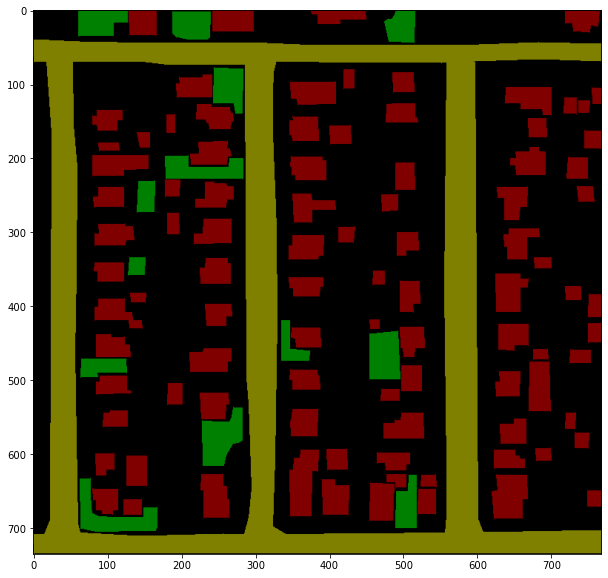

In [81]:
image = cv2.imread('D:\\Study\\DataScience\\GeoAI\\ImageClassification\\ImageSegmentation\\landcover\\mainimage\\label.png')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,10))
plt.imshow(image)

In [78]:
import fiona
import rasterio.features

# Create schema for shapefiles
schema = {"geometry": "Polygon", "properties": {"value": "int"}}

# Define class labels
CLASSES = ['building', 'grass', 'road']

In [84]:
# Reqad the Label mask image and export all the labels as polygon shapefiles
with rasterio.open(label_png) as raster:
    img = raster.read()
    labels = np.asarray(PIL.Image.open(label_png))
    
    # Create boolean masked array for each class > here classes are ['building', 'grass', 'road']
    for label in np.unique(labels):
        # Skip zero values as it is used for background label
        if(label != 0):
            # Create a binary mask for each label value
            mask = (labels == label)
            #print(label), print(CLASSES[label]), print(mask.shape)
            
            # Convert to uint8 for rasterio.features.shapes
            mask = mask.astype('uint8')
            shapes = rasterio.features.shapes(mask, transform = raster.transform)
            
            # Select the records from shapes where the value is 1 or where the mask is True
            records = [{"geometry": geometry, "properties": {"value": value}}
               for (geometry, value) in shapes if value == 1]
    
            # Shapefile path
            image_name = os.path.basename(label_png)
            shp_folder = 'D:\\Study\\DataScience\\GeoAI\\ImageClassification\\ImageSegmentation\\landcover\\mainimage'
            shp_name = os.path.join(shp_folder, image_name.split('.')[0] + '_' + (CLASSES[label-1]) + '.shp')
            
            # Set crs for shapefile 
            crs = rasterio.crs.CRS({"init": "epsg:4326"})
            
            # Export records as polygon shapefile
            
            with fiona.open(shp_name, "w", "ESRI Shapefile",
                   crs=crs, schema=schema) as out_file:
                out_file.writerecords(records)
            print('Exporting {} shapefile for image - {}.'.format(CLASSES[label-1], image_name))
    
    print('Done..') 

Exporting building shapefile for image - label.png.
Exporting grass shapefile for image - label.png.
Exporting road shapefile for image - label.png.
Done..
